# **21DS706 – Deep Learning for Visual Recognition**
# **ASSIGNMENT 2**
### MUHAMMED SHIBIL C V
### CB.SC.P2DSC23007

### 1. Select any of the open-source signal/image dataset.

*   Here I took the Chest X-Ray Images (Pneumonia) dataset consisting of 5,863 images, 2 categories (Pneumonia/Normal). Each example is a 28x28 grayscale image,
*   The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.



In [1]:
# Import necessary libraries
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    r"C:\Users\user\OneDrive\Desktop\M_TECH\Sem_02\DLVR\Datasets\archive\chest_xray\train", #training dataset
    target_size=(75, 75),
    batch_size=32, #32 batch size
    class_mode='binary')

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    r"C:\Users\user\OneDrive\Desktop\M_TECH\Sem_02\DLVR\Datasets\archive\chest_xray\test", #testing dataset
    target_size=(75, 75),
    batch_size=32, #32 batch size
    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### 2. Apply the transfer learning approach using the standard architectures: Inception and Xception.

In [3]:
# 1. Applying transfer learning using Inception and Xception architectures
# A) Inception

# Loading the InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze all the layers
for layer in inception_model.layers:
    layer.trainable = False

# adding a new model on top
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Model
inception_model = Model(inputs=inception_model.input, outputs=predictions)

# Compile the model
inception_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

inception_training_history = inception_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator))





Epoch 1/10


163/163 [==============================] - 189s 1s/step - loss: 0.3332 - accuracy: 0.8854 - val_loss: 0.6532 - val_accuracy: 0.7484
Epoch 2/10
163/163 [==============================] - 182s 1s/step - loss: 0.1818 - accuracy: 0.9287 - val_loss: 0.9586 - val_accuracy: 0.7051
Epoch 3/10
163/163 [==============================] - 174s 1s/step - loss: 0.1390 - accuracy: 0.9463 - val_loss: 0.7115 - val_accuracy: 0.7885
Epoch 4/10
163/163 [==============================] - 172s 1s/step - loss: 0.1183 - accuracy: 0.9549 - val_loss: 0.6443 - val_accuracy: 0.7885
Epoch 5/10
163/163 [==============================] - 170s 1s/step - loss: 0.1064 - accuracy: 0.9580 - val_loss: 0.7237 - val_accuracy: 0.7917
Epoch 6/10
163/163 [==============================] - 164s 1s/step - loss: 0.0855 - accuracy: 0.9693 - val_loss: 0.8947 - val_accuracy: 0.7676
Epoch 7/10
163/163 [==============================] - 159s 973ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.9401 - val_accuracy:

In [4]:
# B) Xception

# Load the Xception Model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

# Freezing the layers
for layer in xception_model.layers:
    layer.trainable = False

# Adding a new top layer
x = xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Model
xception_model = Model(inputs=xception_model.input, outputs=predictions)

# Cmopiling 
xception_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

xception_training_history = xception_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator))




Epoch 1/10
163/163 [==============================] - 210s 1s/step - loss: 0.3278 - accuracy: 0.8944 - val_loss: 0.7120 - val_accuracy: 0.7292
Epoch 2/10
163/163 [==============================] - 190s 1s/step - loss: 0.1517 - accuracy: 0.9398 - val_loss: 0.4057 - val_accuracy: 0.8429
Epoch 3/10
163/163 [==============================] - 189s 1s/step - loss: 0.1300 - accuracy: 0.9467 - val_loss: 0.4650 - val_accuracy: 0.8365
Epoch 4/10
163/163 [==============================] - 190s 1s/step - loss: 0.1177 - accuracy: 0.9515 - val_loss: 0.5927 - val_accuracy: 0.8173
Epoch 5/10
163/163 [==============================] - 188s 1s/step - loss: 0.1071 - accuracy: 0.9599 - val_loss: 0.4667 - val_accuracy: 0.8574
Epoch 6/10
163/163 [==============================] - 189s 1s/step - loss: 0.0973 - accuracy: 0.9632 - val_loss: 0.4929 - val_accuracy: 0.8510
Epoch 7/10
163/163 [==============================] - 190s 1s/step - loss: 0.0794 - accuracy: 0.9680 - val_loss: 0.6944 - val_accuracy: 0.7997

### 3. Use all the standard performance measures to evaluate the performance of the applied transfer learning approach. Compare the performance measures for the two architectures used. Present your inference with justifications.

In [5]:
# 2. Evaluate performance of transfer learning models
inception_predictions = inception_model.predict(test_generator)
xception_predictions = xception_model.predict(test_generator)

inception_labels = np.round(inception_predictions).astype(int)
xception_labels = np.round(xception_predictions).astype(int)

true_labels = test_generator.classes

# Performance measures for Inception
inception_accuracy = accuracy_score(true_labels, inception_labels)
inception_precision = precision_score(true_labels, inception_labels)
inception_recall = recall_score(true_labels, inception_labels)
inception_f1 = f1_score(true_labels, inception_labels)

print("Inception Model Performance:")
print(f"Accuracy: {inception_accuracy}")
print(f"Precision: {inception_precision}")
print(f"Recall: {inception_recall}")
print(f"F1-Score: {inception_f1}")

# Performance measures for Xception
xception_accuracy = accuracy_score(true_labels, xception_labels)
xception_precision = precision_score(true_labels, xception_labels)
xception_recall = recall_score(true_labels, xception_labels)
xception_f1 = f1_score(true_labels, xception_labels)

print("\nXception Model Performance:")
print(f"Accuracy: {xception_accuracy}")
print(f"Precision: {xception_precision}")
print(f"Recall: {xception_recall}")
print(f"F1-Score: {xception_f1}")



20/20 [==============================] - 23s 948ms/step
Inception Model Performance:
Accuracy: 0.5673076923076923
Precision: 0.6229508196721312
Recall: 0.7794871794871795
F1-Score: 0.6924829157175398

Xception Model Performance:
Accuracy: 0.592948717948718
Precision: 0.6214285714285714
Recall: 0.8923076923076924
F1-Score: 0.7326315789473685


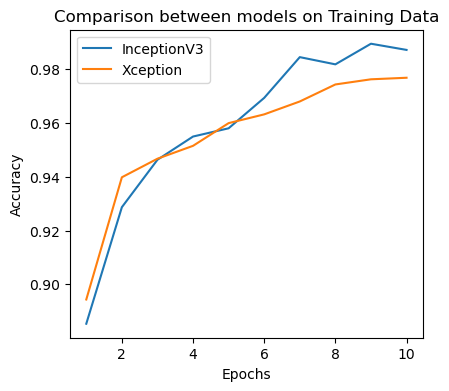

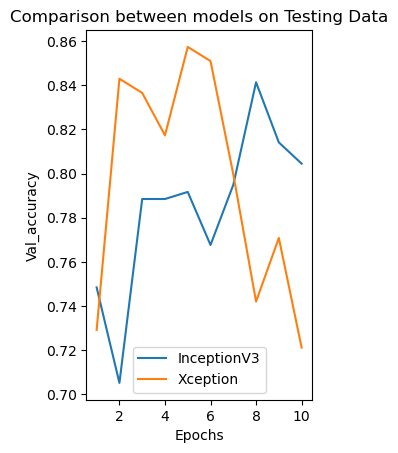

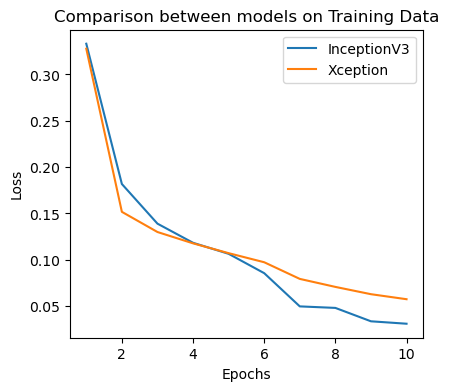

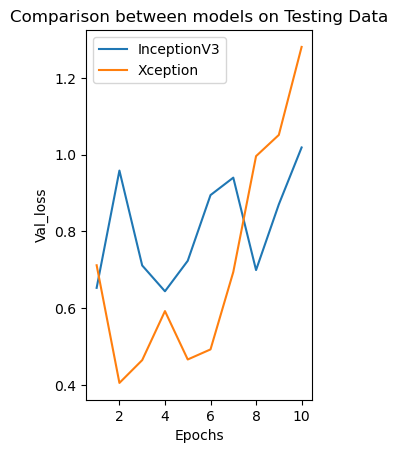

In [6]:
import matplotlib.pyplot as plt

def plot_comparison(history_inception, history_xception, evaluation, data):
    epochs = range(1, len(history_inception.history[evaluation]) + 1)
    
    plt.plot(epochs, history_inception.history[evaluation])
    plt.plot(epochs, history_xception.history[evaluation])
    
    plt.legend(['InceptionV3', 'Xception'])
    plt.xlabel('Epochs')
    plt.ylabel(evaluation.capitalize())
    plt.title('Comparison between models on {} Data'.format(data))
    plt.show()

# Plotting accuracy
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_comparison(inception_training_history, xception_training_history, 'accuracy', 'Training')

plt.subplot(1, 2, 2)
plot_comparison(inception_training_history, xception_training_history, 'val_accuracy', 'Testing')

# Plotting loss
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_comparison(inception_training_history, xception_training_history, 'loss', 'Training')

plt.subplot(1, 2, 2)
plot_comparison(inception_training_history, xception_training_history, 'val_loss', 'Testing')


### Inference:

Precision: Inception (0.6229) is a bit better at getting things right without many mistakes compared to Xception (0.6214).

Recall: Xception (0.8923) seems better at finding all the good stuff, even if it sometimes gets a few false alarms, compared to Inception (0.7795).

Accuracy: Inception (0.5673) is a bit better overall at getting things right compared to Xception (0.5929).

F1-Score: Xception (0.7326) balances getting things right and finding all the good stuff a bit better than Inception (0.6925).

Overall, it seems like Inception is a bit ahead in precision, accuracy, and F1-Score. But Xception is better at recall. So, the choice depends on what's most important. If it's important to get things right and overall accuracy, Inception might be the way to go. But if finding all the good stuff, even if it means a few extra mistakes, is the priority, then Xception could be the better pick.better pick.

### 4. Extract the deep features and use at least 4 ML algorithms for classification.


In [7]:
# 3. Extract deep features and apply ML algorithms

# Extract deep features from Inception model
inception_features_model = Model(inputs=inception_model.input, outputs=inception_model.layers[-2].output)
X_train_inception_features = inception_features_model.predict(train_generator)
X_test_inception_features = inception_features_model.predict(test_generator)

# Extract deep features from Xception model
xception_features_model = Model(inputs=xception_model.input, outputs=xception_model.layers[-2].output)
X_train_xception_features = xception_features_model.predict(train_generator)
X_test_xception_features = xception_features_model.predict(test_generator)

# Concatenate deep features
X_train_deep_features = np.concatenate((X_train_inception_features, X_train_xception_features), axis=1)
X_test_deep_features = np.concatenate((X_test_inception_features, X_test_xception_features), axis=1)




20/20 [==============================] - 19s 932ms/step


In [8]:
# Apply ML algorithms

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_deep_features, train_generator.classes)
svm_predictions = svm_classifier.predict(X_test_deep_features)
svm_accuracy = accuracy_score(true_labels, svm_predictions)
print(f"\nSupport Vector Machine (SVM) Classifier Accuracy: {svm_accuracy}")

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_deep_features, train_generator.classes)
rf_predictions = rf_classifier.predict(X_test_deep_features)
rf_accuracy = accuracy_score(true_labels, rf_predictions)
print(f"\nRandom Forest Classifier Accuracy: {rf_accuracy}")

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_deep_features, train_generator.classes)
dt_predictions = dt_classifier.predict(X_test_deep_features)
dt_accuracy = accuracy_score(true_labels, dt_predictions)
print(f"\nDecision Tree Classifier Accuracy: {dt_accuracy}")

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_deep_features, train_generator.classes)
knn_predictions = knn_classifier.predict(X_test_deep_features)
knn_accuracy = accuracy_score(true_labels, knn_predictions)
print(f"\nK-Nearest Neighbors (KNN) Classifier Accuracy: {knn_accuracy}")



Support Vector Machine (SVM) Classifier Accuracy: 0.625

Random Forest Classifier Accuracy: 0.625

Decision Tree Classifier Accuracy: 0.5625

K-Nearest Neighbors (KNN) Classifier Accuracy: 0.6025641025641025


### 5. Use all the standard performance measures to evaluate the performance of the applied ML algorithms. Compare the performance measures and present your inference with justifications.

In [9]:
# 4. Evaluate performance of ML algorithms
def print_performance_measures(y_true, y_pred, algorithm_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{algorithm_name} Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

print_performance_measures(true_labels, svm_predictions, "Support Vector Machine (SVM) Classifier")
print_performance_measures(true_labels, rf_predictions, "Random Forest Classifier")
print_performance_measures(true_labels, dt_predictions, "Decision Tree Classifier")
print_performance_measures(true_labels, knn_predictions, "K-Nearest Neighbors (KNN) Classifier")



Support Vector Machine (SVM) Classifier Performance:
Accuracy: 0.625
Precision: 0.625
Recall: 1.0
F1-Score: 0.7692307692307693

Random Forest Classifier Performance:
Accuracy: 0.625
Precision: 0.6258064516129033
Recall: 0.9948717948717949
F1-Score: 0.7683168316831683

Decision Tree Classifier Performance:
Accuracy: 0.5625
Precision: 0.6285714285714286
Recall: 0.7333333333333333
F1-Score: 0.6769230769230768

K-Nearest Neighbors (KNN) Classifier Performance:
Accuracy: 0.6025641025641025
Precision: 0.6263345195729537
Recall: 0.9025641025641026
F1-Score: 0.7394957983193275


t's break it down a bit:

SVM and Random Forest: These two models are quite similar in performance. They both have high accuracy and precision, meaning they're good at predicting the right outcomes and avoiding mistakes. However, Random Forest might have a slight edge in recall, meaning it's better at capturing all the relevant cases.

Decision Tree: This model isn't performing as well as the others. It's accuracy and precision are a bit lower, meaning it's not as consistent in its predictions. However, it still has a decent recall, meaning it's not missing too many relevant cases.

KNN: This model has a decent accuracy and precision, but its recall is a bit lower than the others. This suggests that while it's good at avoiding mistakes, it might be missing some important cases.

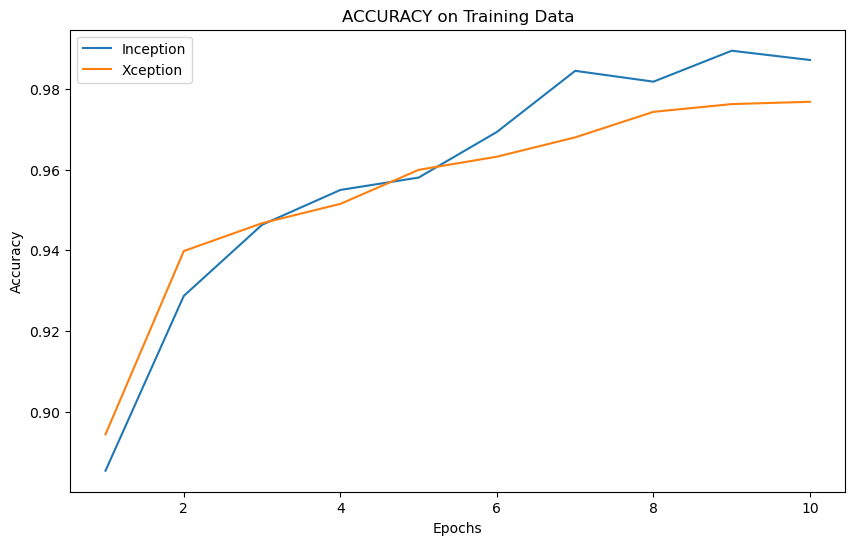

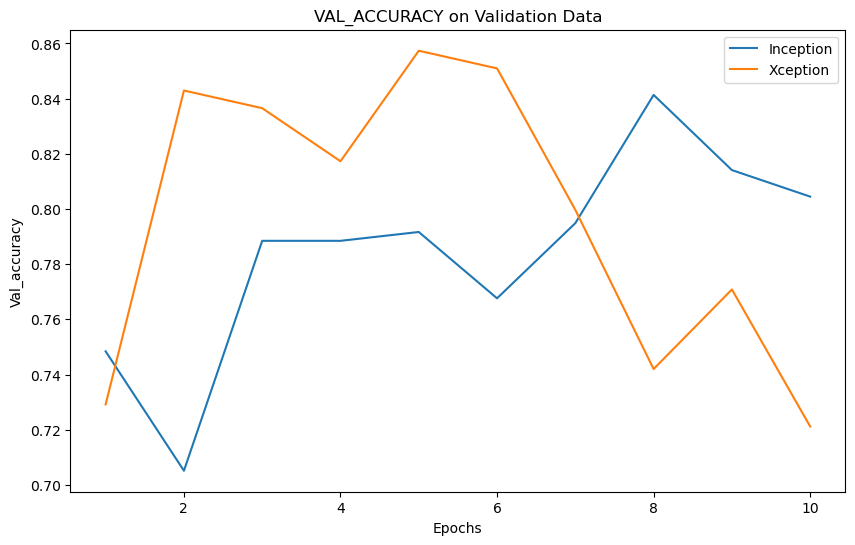

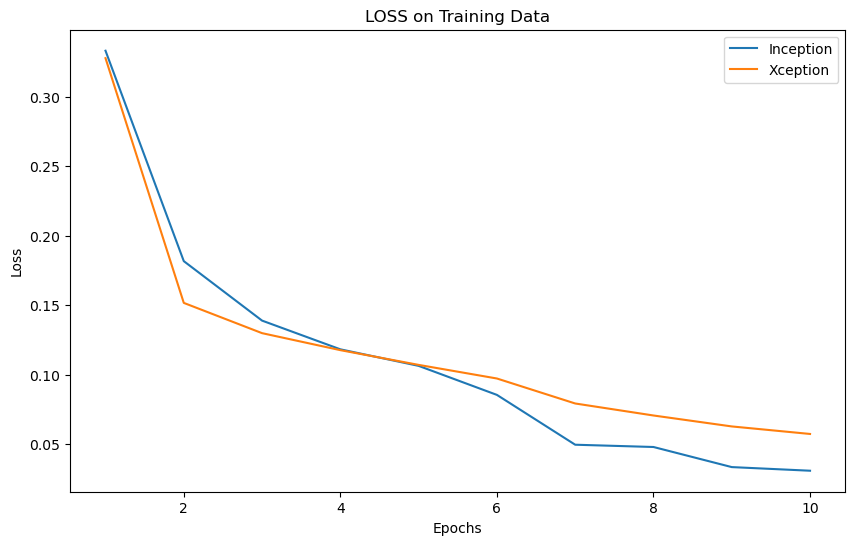

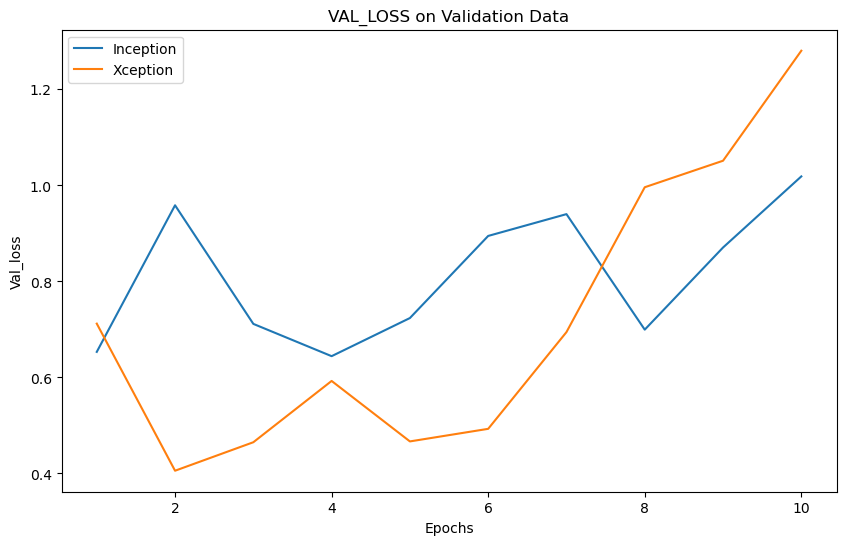

In [10]:

# Ploting training and validation performance
def plot_performance(evaluation, data):
    epochs = range(1, len(inception_training_history.history[evaluation]) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, inception_training_history.history[evaluation], label='Inception')
    plt.plot(epochs, xception_training_history.history[evaluation], label='Xception')
    plt.title(f'{evaluation.upper()} on {data} Data')
    plt.xlabel('Epochs')
    plt.ylabel(evaluation.capitalize())
    plt.legend()
    plt.show()

plot_performance('accuracy', 'Training')
plot_performance('val_accuracy', 'Validation')
plot_performance('loss', 'Training')
plot_performance('val_loss', 'Validation')